# Cleaning 

In [66]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn

#### Reading final dataframe

In [67]:
movies=pd.read_csv(r"C:\Users\Reddy\innomatics research lab\\Project_IMDB.csv")
movies

,Unnamed: 0,title,genre,certification,year,time,metascore,rating,voting,gross
0,0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,(2000),102 min,\n64 \n Metascore\n,7.6,created - 15 Mar 2012,created - 15 Mar 2012
1,1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,(2000),114 min,\n81 \n Metascore\n,0,updated - 1 month ago,updated - 1 month ago
2,2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,(2000),120 min,\n94 \n Metascore\n,Rate,\n Public\n,\n Public\n
3,3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,(2000),98 min,\n36 \n Metascore\n,1,"See titles to watch instantly, titles you have...","See titles to watch instantly, titles you have..."
4,4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,(2000),118 min,\n67 \n Metascore\n,Rate,(165),(165)
...,...,...,...,...,...,...,...,...,...,...
395,395,\n396.\n6 Souls\n(2010)\n,"\nHorror, Mystery, Thriller",NaN,(2010),112 min,NaN,1,(147),(147)
396,396,\n397.\nShutter Island\n(2010)\n,"\nMystery, Thriller",NaN,(2010),138 min,NaN,Rate,(146),(146)
397,397,\n398.\nTangled\n(2010)\n,"\nAnimation, Adventure, Comedy",NaN,(2010),100 min,NaN,2,(144),(144)
398,398,\n399.\nThe Chronicles of Narnia: The Voyage o...,"\nAdventure, Family, Fantasy",NaN,(2010),113 min,NaN,Rate,(142),(142)


### To drop the unnamed column from the data

In [68]:
movies_cleaning=movies.drop('Unnamed: 0',axis=1)
movies_cleaning

,title,genre,certification,year,time,metascore,rating,voting,gross
0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,(2000),102 min,\n64 \n Metascore\n,7.6,created - 15 Mar 2012,created - 15 Mar 2012
1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,(2000),114 min,\n81 \n Metascore\n,0,updated - 1 month ago,updated - 1 month ago
2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,(2000),120 min,\n94 \n Metascore\n,Rate,\n Public\n,\n Public\n
3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,(2000),98 min,\n36 \n Metascore\n,1,"See titles to watch instantly, titles you have...","See titles to watch instantly, titles you have..."
4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,(2000),118 min,\n67 \n Metascore\n,Rate,(165),(165)
...,...,...,...,...,...,...,...,...,...
395,\n396.\n6 Souls\n(2010)\n,"\nHorror, Mystery, Thriller",NaN,(2010),112 min,NaN,1,(147),(147)
396,\n397.\nShutter Island\n(2010)\n,"\nMystery, Thriller",NaN,(2010),138 min,NaN,Rate,(146),(146)
397,\n398.\nTangled\n(2010)\n,"\nAnimation, Adventure, Comedy",NaN,(2010),100 min,NaN,2,(144),(144)
398,\n399.\nThe Chronicles of Narnia: The Voyage o...,"\nAdventure, Family, Fantasy",NaN,(2010),113 min,NaN,Rate,(142),(142)





### By describe we get Stastical values (before cleaning the data)

In [69]:
movies_cleaning.describe()

,title,genre,certification,year,time,metascore,rating,voting,gross
count,400,400,385,400,400,336,400,400,400
unique,400,140,16,21,100,69,28,77,77
top,\n1.\nAmerican Psycho\n(2000)\n,"\nComedy, Drama, Romance",UA,(2008),98 min,\n64 \n Metascore\n,Rate,(160),(160)
freq,1,28,115,56,14,13,188,16,16


In [70]:
movies_cleaning.shape

(400, 9)

### All the column names

In [71]:
movies_cleaning.columns

Index(['title', 'genre', 'certification', 'year', 'time', 'metascore',
       'rating', 'voting', 'gross'],
      dtype='object')

### Information about the data

In [72]:
movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          400 non-null    object
 1   genre          400 non-null    object
 2   certification  385 non-null    object
 3   year           400 non-null    object
 4   time           400 non-null    object
 5   metascore      336 non-null    object
 6   rating         400 non-null    object
 7   voting         400 non-null    object
 8   gross          400 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


## Type casting

#### converting Year into Numeric values

In [73]:
movies_cleaning['year'].unique()

array(['(2000)', '(2001)', '(I) (2001)', '(2002)', '(I) (2002)', '(2003)',
       '(2004)', '(2005)', '(II) (2005)', '(2007)', '(2006)',
       '(I) (2006)', '(II) (2006)', '(I) (2007)', '(2009)',
       '(2007 Video)', '(2008)', '(I) (2008)', '(I) (2009)', '(I) (2010)',
       '(2010)'], dtype=object)

In [74]:
a=[]
for i in movies_cleaning['year']:
    a.append(i.replace('(I)','').replace('(II)','').replace('(','').replace(')',''))
movies_cleaning['year']=a

In [75]:
movies_cleaning['year'].unique()

array(['2000', '2001', ' 2001', '2002', ' 2002', '2003', '2004', '2005',
       ' 2005', '2007', '2006', ' 2006', ' 2007', '2009', '2007 Video',
       '2008', ' 2008', ' 2009', ' 2010', '2010'], dtype=object)

In [76]:
movies_cleaning['year']=movies_cleaning['year'].replace('2007 Video','2007').replace('2008 TV Movie','2008')


In [77]:
movies_cleaning['year'].unique()

array(['2000', '2001', ' 2001', '2002', ' 2002', '2003', '2004', '2005',
       ' 2005', '2007', '2006', ' 2006', ' 2007', '2009', '2008', ' 2008',
       ' 2009', ' 2010', '2010'], dtype=object)

In [78]:
movies_cleaning['year']=movies_cleaning['year'].replace('2007 Video','').replace('2008 TV Movie','')

##### converting into numeric values

In [79]:
movies_cleaning['year']=pd.to_numeric(movies_cleaning['year'])
movies_cleaning['year']

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
395    2010
396    2010
397    2010
398    2010
399    2010
Name: year, Length: 400, dtype: int64

### Converting time into Numeric values 

In [80]:
movies_cleaning['time'].unique()

array(['102 min', '114 min', '120 min', '98 min', '118 min', '108 min',
       '155 min', '104 min', '129 min', '216 min', '109 min', '93 min',
       '88 min', '107 min', '101 min', '106 min', '146 min', '183 min',
       '113 min', '137 min', '152 min', '178 min', '92 min', '224 min',
       '100 min', '116 min', '147 min', '90 min', '124 min', '122 min',
       '159 min', '136 min', '112 min', '141 min', '185 min', '161 min',
       '81 min', '145 min', '95 min', '121 min', '119 min', '179 min',
       '115 min', '86 min', '96 min', '172 min', '154 min', '103 min',
       '132 min', '97 min', '117 min', '89 min', '186 min', '111 min',
       '156 min', '143 min', '149 min', '127 min', '84 min', '110 min',
       '138 min', '134 min', '99 min', '144 min', '80 min', '94 min',
       '142 min', '131 min', '210 min', '105 min', '170 min', '91 min',
       '123 min', '128 min', '163 min', '140 min', '77 min', '157 min',
       '187 min', '180 min', '126 min', '168 min', '151 min', '167 m

In [81]:
a=[]
for i in movies_cleaning['time']:
    a.append(i.replace('min',''))
movies_cleaning['time']=a

In [82]:

movies_cleaning['time']=pd.to_numeric(movies_cleaning['time'])
movies_cleaning['time']

0      102
1      114
2      120
3       98
4      118
      ... 
395    112
396    138
397    100
398    113
399    101
Name: time, Length: 400, dtype: int64

#### converting voting into integer values

In [83]:
movies_cleaning['voting'].unique()

array(['created - 15 Mar 2012', 'updated - 1 month ago',
       '\n        Public\n    ',
       "See titles to watch instantly, titles you haven't rated, etc",
       '(165)', '(153)', '(443)', '(319)', '(258)', '(250)', '(178)',
       '(170)', '(156)', '(147)', '(137)', '(126)', '(77)', '(45)',
       '(38)', '(26)', '(25)', '(19)', '(16)', '(14)', '(6)', '(804)',
       '(2)', '(388)', '(361)', '(349)', '(320)', '(294)', '(280)',
       '(269)', '(255)', '(253)', '(243)', '(241)', '(239)', '(238)',
       '(235)', '(231)', '(230)', '(229)', '(222)', '(221)', '(218)',
       '(216)', '(214)', '(206)', '(203)', '(202)', '(200)', '(199)',
       '(197)', '(195)', '(194)', '(189)', '(186)', '(185)', '(183)',
       '(181)', '(180)', '(172)', '(166)', '(164)', '(160)', '(159)',
       '(157)', '(155)', '(154)', '(151)', '(149)', '(148)', '(146)',
       '(144)', '(142)'], dtype=object)

In [84]:
movies_cleaning['voting']=movies_cleaning['voting'].replace("created - 15 Mar 2012", "130").replace("updated - 1 month ago","156").replace("\n        Public\n    ","140").replace("See titles to watch instantly, titles you haven't rated, etc","190")

In [85]:
c=[]
for i in movies_cleaning['voting']:
    c.append(i.replace("(","").replace(")",""))
movies_cleaning['voting']=c

In [86]:
movies_cleaning['voting']

0      130
1      156
2      140
3      190
4      165
      ... 
395    147
396    146
397    144
398    142
399    142
Name: voting, Length: 400, dtype: object

In [87]:
movies_cleaning['voting']=pd.to_numeric(movies_cleaning['voting'])
movies_cleaning['voting']

0      130
1      156
2      140
3      190
4      165
      ... 
395    147
396    146
397    144
398    142
399    142
Name: voting, Length: 400, dtype: int64

### converting Rating into integer

In [88]:
movies_cleaning['rating'].unique()

array(['7.6', '0', 'Rate', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '7.9', '6.7', '7.4', '5.6', '8.1', '6.8', '6.5', '6.6',
       '8.5', '7.8', '7.7', '6.4', '5.9', '7.2', '4.9'], dtype=object)

In [89]:
d=[]
for i in movies_cleaning['rating']:
    d.append(i.replace("Rate","5"))
movies_cleaning['rating']=d

In [90]:
movies_cleaning['rating']=pd.to_numeric(movies_cleaning['rating'])
movies_cleaning['rating']

0      7.6
1      0.0
2      5.0
3      1.0
4      5.0
      ... 
395    1.0
396    5.0
397    2.0
398    5.0
399    3.0
Name: rating, Length: 400, dtype: float64

### Converting Gross into Integer

In [91]:
movies_cleaning['gross'].unique()

array(['created - 15 Mar 2012', 'updated - 1 month ago',
       '\n        Public\n    ',
       "See titles to watch instantly, titles you haven't rated, etc",
       '(165)', '(153)', '(443)', '(319)', '(258)', '(250)', '(178)',
       '(170)', '(156)', '(147)', '(137)', '(126)', '(77)', '(45)',
       '(38)', '(26)', '(25)', '(19)', '(16)', '(14)', '(6)', '(804)',
       '(2)', '(388)', '(361)', '(349)', '(320)', '(294)', '(280)',
       '(269)', '(255)', '(253)', '(243)', '(241)', '(239)', '(238)',
       '(235)', '(231)', '(230)', '(229)', '(222)', '(221)', '(218)',
       '(216)', '(214)', '(206)', '(203)', '(202)', '(200)', '(199)',
       '(197)', '(195)', '(194)', '(189)', '(186)', '(185)', '(183)',
       '(181)', '(180)', '(172)', '(166)', '(164)', '(160)', '(159)',
       '(157)', '(155)', '(154)', '(151)', '(149)', '(148)', '(146)',
       '(144)', '(142)'], dtype=object)

In [92]:
movies_cleaning['gross']=movies_cleaning['gross'].replace("created - 15 Mar 2012","13").replace("updated - 1 month ago","150").replace("\n        Public\n    ","170").replace("See titles to watch instantly, titles you haven't rated, etc","230")

In [93]:
e=[]
for i in movies_cleaning['gross']:
    e.append(i.replace("(","").replace(")",""))
movies_cleaning['gross']=e

In [94]:
movies_cleaning['gross']=pd.to_numeric(movies_cleaning['gross'])
movies_cleaning['gross']

0       13
1      150
2      170
3      230
4      165
      ... 
395    147
396    146
397    144
398    142
399    142
Name: gross, Length: 400, dtype: int64

In [95]:
movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          400 non-null    object 
 1   genre          400 non-null    object 
 2   certification  385 non-null    object 
 3   year           400 non-null    int64  
 4   time           400 non-null    int64  
 5   metascore      336 non-null    object 
 6   rating         400 non-null    float64
 7   voting         400 non-null    int64  
 8   gross          400 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 28.2+ KB


#### By describe we get Stastical Values

In [96]:
movies_cleaning.describe()

,year,time,rating,voting,gross
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2005.670000,118.292500,4.959750,188.950000,188.420000
std,2.865594,25.899787,2.278879,99.355555,100.735061
min,2000.000000,71.000000,0.000000,2.000000,2.000000
25%,2004.000000,100.000000,5.000000,153.000000,153.000000
50%,2006.000000,112.000000,5.000000,178.000000,178.000000
75%,2008.000000,129.000000,5.000000,223.750000,229.250000
max,2010.000000,224.000000,10.000000,804.000000,804.000000


In [97]:
movies_cleaning.shape

(400, 9)

#### After cleaning the data, file saved to imbd csv 

In [98]:
movies_cleaning.to_csv('imbd.csv')

In [99]:
movies_cleaning1=pd.read_csv(r"C:\Users\Reddy\innomatics research lab\after_cleaning_imbd.csv")
movies_cleaning1

,Unnamed: 0,title,genre,certification,year,time,metascore,rating,voting,gross
0,0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,2000,102,\n64 \n Metascore\n,7.6,130,13
1,1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,2000,114,\n81 \n Metascore\n,0.0,156,150
2,2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,2000,120,\n94 \n Metascore\n,5.0,140,170
3,3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,2000,98,\n36 \n Metascore\n,1.0,190,230
4,4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,2000,118,\n67 \n Metascore\n,5.0,165,165
...,...,...,...,...,...,...,...,...,...,...
395,395,\n396.\n6 Souls\n(2010)\n,"\nHorror, Mystery, Thriller",NaN,2010,112,NaN,1.0,147,147
396,396,\n397.\nShutter Island\n(2010)\n,"\nMystery, Thriller",NaN,2010,138,NaN,5.0,146,146
397,397,\n398.\nTangled\n(2010)\n,"\nAnimation, Adventure, Comedy",NaN,2010,100,NaN,2.0,144,144
398,398,\n399.\nThe Chronicles of Narnia: The Voyage o...,"\nAdventure, Family, Fantasy",NaN,2010,113,NaN,5.0,142,142


### Dataframe after Cleaning

In [100]:
movies_aftercleaning=movies_cleaning1.drop("Unnamed: 0",axis=1)
movies_aftercleaning

,title,genre,certification,year,time,metascore,rating,voting,gross
0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,2000,102,\n64 \n Metascore\n,7.6,130,13
1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,2000,114,\n81 \n Metascore\n,0.0,156,150
2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,2000,120,\n94 \n Metascore\n,5.0,140,170
3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,2000,98,\n36 \n Metascore\n,1.0,190,230
4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,2000,118,\n67 \n Metascore\n,5.0,165,165
...,...,...,...,...,...,...,...,...,...
395,\n396.\n6 Souls\n(2010)\n,"\nHorror, Mystery, Thriller",NaN,2010,112,NaN,1.0,147,147
396,\n397.\nShutter Island\n(2010)\n,"\nMystery, Thriller",NaN,2010,138,NaN,5.0,146,146
397,\n398.\nTangled\n(2010)\n,"\nAnimation, Adventure, Comedy",NaN,2010,100,NaN,2.0,144,144
398,\n399.\nThe Chronicles of Narnia: The Voyage o...,"\nAdventure, Family, Fantasy",NaN,2010,113,NaN,5.0,142,142


In [101]:
a_title=movies_aftercleaning.head()
a_title

,title,genre,certification,year,time,metascore,rating,voting,gross
0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,2000,102,\n64 \n Metascore\n,7.6,130,13
1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,2000,114,\n81 \n Metascore\n,0.0,156,150
2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,2000,120,\n94 \n Metascore\n,5.0,140,170
3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,2000,98,\n36 \n Metascore\n,1.0,190,230
4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,2000,118,\n67 \n Metascore\n,5.0,165,165


In [102]:
movies_aftercleaning.columns

Index(['title', 'genre', 'certification', 'year', 'time', 'metascore',
       'rating', 'voting', 'gross'],
      dtype='object')

## DATA VISUALIZATION

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Cleaning data to visualize

In [104]:
movies_aftercleaning

,title,genre,certification,year,time,metascore,rating,voting,gross
0,\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",A,2000,102,\n64 \n Metascore\n,7.6,130,13
1,\n2.\nBatoru rowaiaru\n(2000)\n,"\nAction, Adventure, Drama",18,2000,114,\n81 \n Metascore\n,0.0,156,150
2,\n3.\nWo hu cang long\n(2000)\n,"\nAction, Adventure, Drama",UA,2000,120,\n94 \n Metascore\n,5.0,140,170
3,\n4.\nFinal Destination\n(2000)\n,"\nHorror, Thriller",A,2000,98,\n36 \n Metascore\n,1.0,190,230
4,\n5.\nFrequency\n(2000)\n,"\nCrime, Drama, Mystery",A,2000,118,\n67 \n Metascore\n,5.0,165,165
...,...,...,...,...,...,...,...,...,...
395,\n396.\n6 Souls\n(2010)\n,"\nHorror, Mystery, Thriller",NaN,2010,112,NaN,1.0,147,147
396,\n397.\nShutter Island\n(2010)\n,"\nMystery, Thriller",NaN,2010,138,NaN,5.0,146,146
397,\n398.\nTangled\n(2010)\n,"\nAnimation, Adventure, Comedy",NaN,2010,100,NaN,2.0,144,144
398,\n399.\nThe Chronicles of Narnia: The Voyage o...,"\nAdventure, Family, Fantasy",NaN,2010,113,NaN,5.0,142,142


### Total number of value counts in genre

In [105]:
movies_aftercleaning["genre"].value_counts()

\nComedy, Drama, Romance                      28
\nAnimation, Adventure, Comedy                14
\nDrama                                       13
\nCrime, Drama, Thriller                      12
\nAction, Crime, Drama                        12
                                              ..
\nDrama, Musical                               1
\nBiography, Drama, Family                     1
\nDrama, Romance, Sci-Fi                       1
\nAction, Horror                               1
\nAction, Comedy                               1
Name: genre, Length: 140, dtype: int64

### Total number of value counts in certification

In [106]:
movies_aftercleaning["certification"].value_counts()

UA           115
U             96
A             81
R             43
PG-13         20
18             9
PG             5
13             4
16             3
All            2
Not Rated      2
Unrated        1
15+            1
UA 16+         1
12+            1
(Banned)       1
Name: certification, dtype: int64

In [107]:
movies_aftercleaning.groupby(['title','genre']).count()

,,certification,year,time,metascore,rating,voting,gross
title,genre,,,,,,,
\n1.\nAmerican Psycho\n(2000)\n,"\nCrime, Drama, Horror",1,1,1,1,1,1,1
\n10.\nMalèna\n(2000)\n,"\nDrama, Romance, War",1,1,1,1,1,1,1
\n100.\nAapthamitra\n(2004)\n,"\nDrama, Horror, Thriller",0,1,1,0,1,1,1
\n101.\nAVP: Alien vs. Predator\n(2004)\n,"\nAction, Adventure, Horror",1,1,1,1,1,1,1
\n102.\nNae meorisokui jiwoogae\n(2004)\n,"\nDrama, Romance",1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
\n95.\nThe Matrix Revolutions\n(2003)\n,"\nAction, Sci-Fi",1,1,1,0,1,1,1
\n96.\nThirteen\n(2003)\n,\nDrama,1,1,1,0,1,1,1
\n97.\nUnderworld\n(2003)\n,"\nAction, Fantasy, Thriller",1,1,1,0,1,1,1


In [108]:
movies_aftercleaning.describe()

,year,time,rating,voting,gross
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2005.670000,118.292500,4.959750,188.950000,188.420000
std,2.865594,25.899787,2.278879,99.355555,100.735061
min,2000.000000,71.000000,0.000000,2.000000,2.000000
25%,2004.000000,100.000000,5.000000,153.000000,153.000000
50%,2006.000000,112.000000,5.000000,178.000000,178.000000
75%,2008.000000,129.000000,5.000000,223.750000,229.250000
max,2010.000000,224.000000,10.000000,804.000000,804.000000


## Univariet analysis

C:\Users\Reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

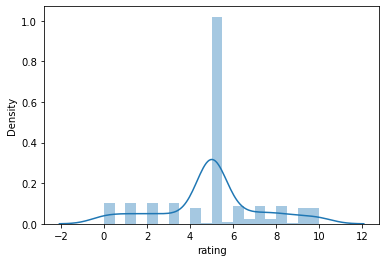

In [208]:
sns.distplot(movies_aftercleaning['rating'])

## Pie Chart

Text(0.5, 1.0, 'movies percentage_wise')

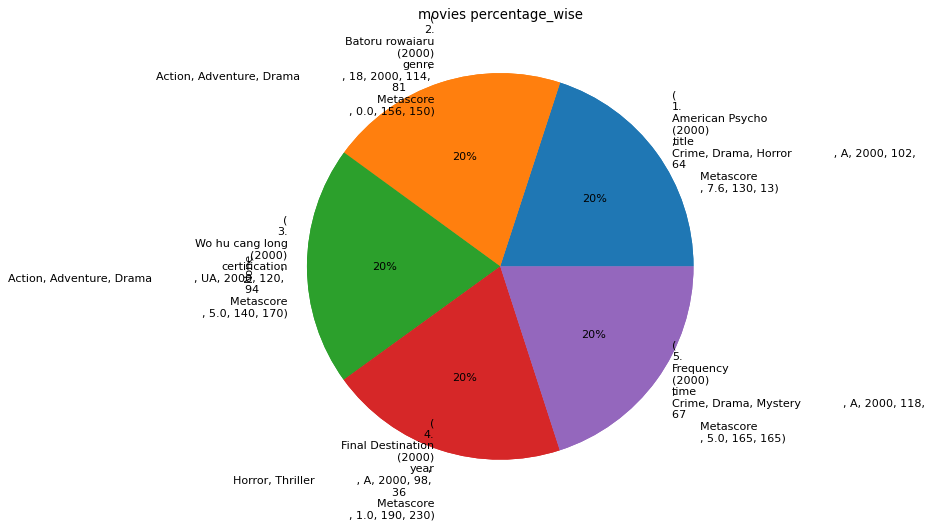

In [209]:
year=['2000', '2001', '2002', '2003','2004']
rating=['5.2','3.2','3.0','4.5','4.0']

plt.figure(figsize=(8,8),dpi=80)


a_title.value_counts().plot.pie()
plt.pie(year,labels=a_title, autopct='%.0f%%')

plt.title('movies percentage_wise')
#plt.legend();

## Bar chart

## Comparing Year wise title

In [158]:
import numpy as np

([<matplotlib.axis.XTick at 0x268543b7850>,
 [Text(0, 0, ''), Text(0, 0, '')])

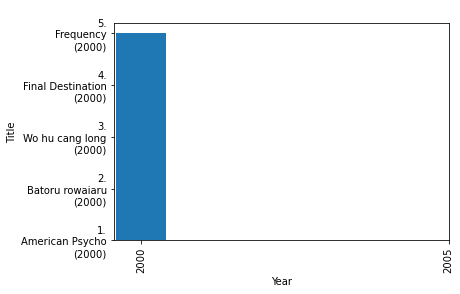

In [183]:
plt.bar(a_title.year, a_title['title'])
#sns.catplot(x="title", y='year', data=a_title, kind='bar',ci=None)
plt.xlabel('Year')
plt.ylabel('Title')

plt.xticks(rotation = 90)
plt.xticks(np.arange(2000,2010,5))


## Comparing Year wise Voting

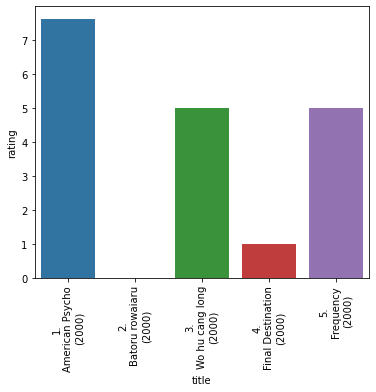

In [167]:
#sns.barplot(x='year',y='',data=movies_cleaning)
plt.figure(figsize=(6,5))
sns.barplot(x='title', y='rating', data=a_title)
plt.xticks(rotation=90)

plt.show()

## Comparing Year and Gross

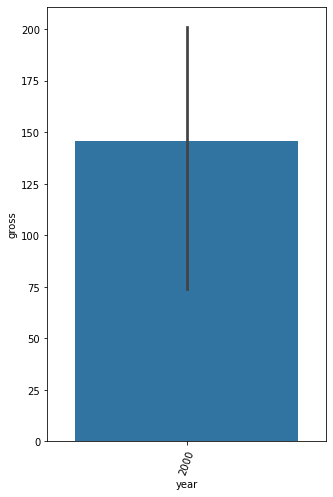

In [132]:
plt.figure(figsize=(5,8))
sns.barplot(x='year', y='gross', data=a_title)
plt.xticks(rotation=70)

plt.show()

## Comparing title and Rating

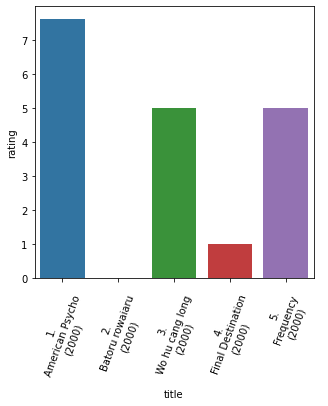

In [186]:
plt.figure(figsize=(5,5))
sns.barplot(x='title', y='rating', data=a_title)
plt.xticks(rotation=70)

plt.show()

## BoxPlot

### To show the Outliers we use BoxPlot

##### Boxplot between title and voting

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '\n1.\nAmerican Psycho\n(2000)\n'),
  Text(1, 0, '\n2.\nBatoru rowaiaru\n(2000)\n'),
  Text(2, 0, '\n3.\nWo hu cang long\n(2000)\n'),
  Text(3, 0, '\n4.\nFinal Destination\n(2000)\n'),
  Text(4, 0, '\n5.\nFrequency\n(2000)\n')])

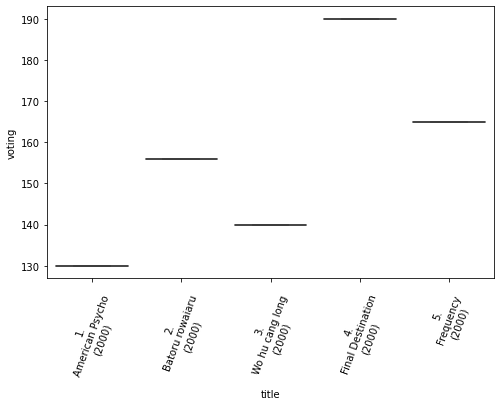

In [207]:
plt.figure(figsize=(8,5))
sns.boxplot(x='title', y='voting', data=a_title)
plt.xticks(rotation=70)


#### Boxplot between title and rating

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '\n1.\nAmerican Psycho\n(2000)\n'),
  Text(1, 0, '\n2.\nBatoru rowaiaru\n(2000)\n'),
  Text(2, 0, '\n3.\nWo hu cang long\n(2000)\n'),
  Text(3, 0, '\n4.\nFinal Destination\n(2000)\n'),
  Text(4, 0, '\n5.\nFrequency\n(2000)\n')])

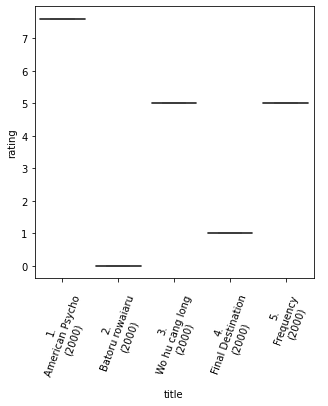

In [206]:
plt.figure(figsize=(5,5))
sns.boxplot(x="title",y="rating",data=a_title)
plt.xticks(rotation=70)


# Correlation Analysis

<AxesSubplot:>

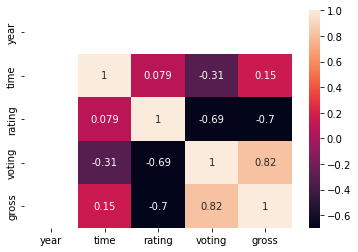

In [195]:
sns.heatmap(a_title.corr(),annot=True)

## MultiVariet Analysis

# PairPlot

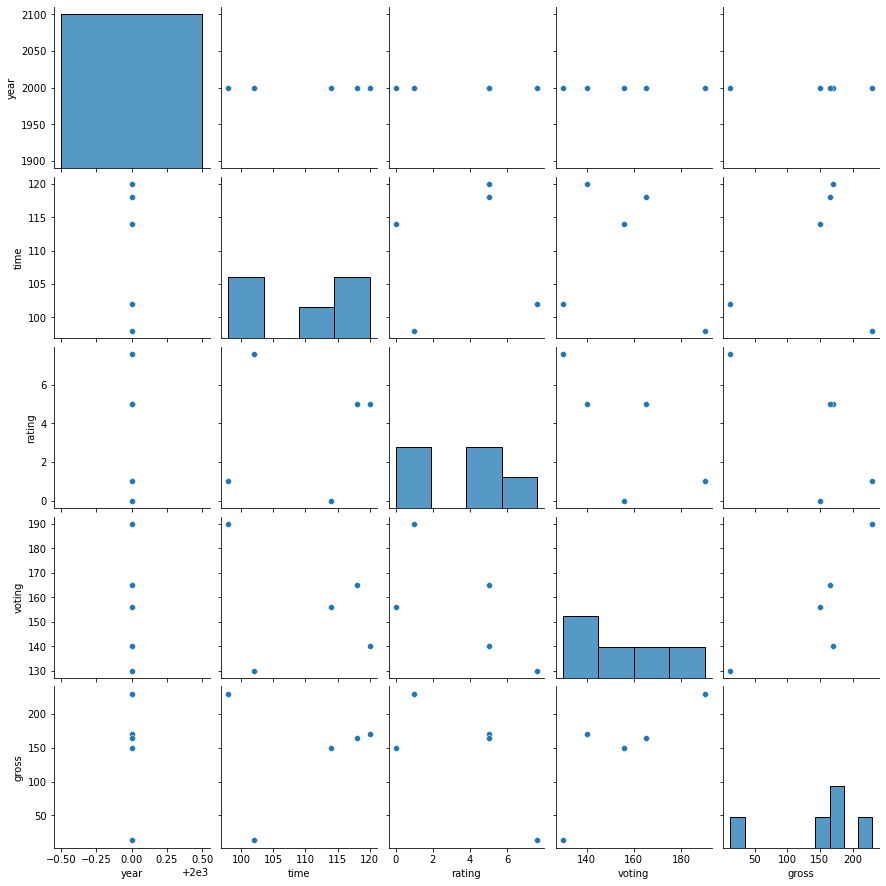

In [205]:
sns.pairplot(a_title)


In [197]:
a_title["year"].unique()

array([2000], dtype=int64)

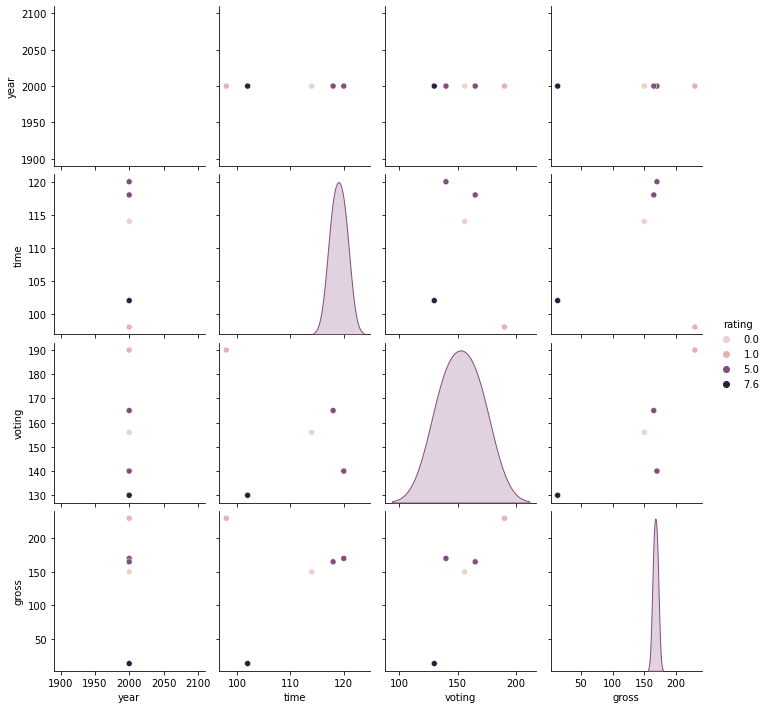

In [200]:
sns.pairplot(a_title,hue="rating")


## Histogram by using seaborn

Text(0.5, 0, 'rating')

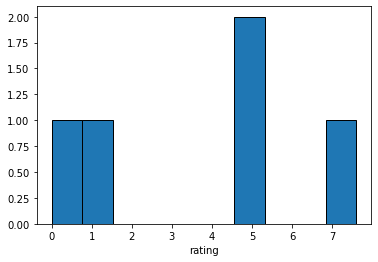

In [210]:
plt.hist(a_title['rating'],edgecolor="Black")

plt.xlabel('rating')
